# Логирование экспериментов

Итак, запуск экспериментов по машинному обучению включает в себя множество задач, таких как EDA и предобработка данных. В последнюю может входить заполнение пропусков данных, проверка различных алгоритмов с целью поиска наилучшего, анализ производительности модели и другие связанные задачи, которые зависят от решаемой проблемы.

Как вы уже знаете, в процессе проведения эксперимента по машинному обучению можно использовать функцию print() для просмотра выходных данных экспериментов, таких как уровень корреляции данных в выборке, результат тестирования статистической гипотезы и так далее. 

Однако время от времени выводить результат на экран с помощью функции print() бесполезно, так как при запуске следующего эксперимента вы потеряете все результаты предыдущего эксперимента, если не запишете их вручную в документ.

Таким образом, сравнение результатов ML-экспериментов становится весьма затруднительным процессом, потому что необходимо иметь записи всех проводимых ранее экспериментов. Например, если во время EDA-задачи предсказания спроса на лекарство изменяются данные, то каждый раз выводить на экран новую визуализацию неудобно.

Логирование решает эту проблему! Даже если информация изменится с запуском нового эксперимента, всё будет зафиксировано в логе.

**Лог (log)** — это специальный журнал, в котором хранится информация о состоянии работы программы. Логирование (ведение журнала) обеспечивает отслеживание событий, происходящих во время работы программы, и может выводить эти события в отдельный файл, чтобы вы могли отслеживать, что происходит во время выполнения кода.

Пример такого файла:

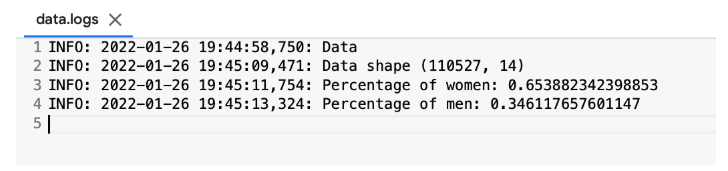

Здесь зафиксирована информация о форме данных и соотношение классов целевой переменной Gender. Это даёт возможность отлаживать код. Далее мы подробнее разберём, как создавать логи. 

Для логирования в Python используется модуль logging. Он используется большинством сторонних библиотек Python, поэтому вы можете интегрировать свои логи с сообщениями из этих библиотек для создания единого журнала логов приложения. Данный модуль импортируется как другие библиотеки:

In [46]:
import logging
import pandas as pd

Прежде чем приступить к логированию, необходимо установить базовые настройки:

- уровень;
- обработчик (хендлер);
- формат логирования.


**Давайте разберёмся с этими конфигурациями по порядку.**

## Настройка уровня логирования

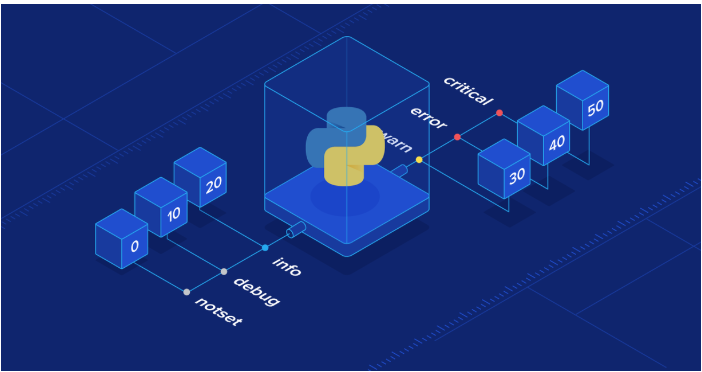

С импортированным модулем logging вы можете использовать так называемый «logger» для логирования сообщений, которые вы хотите видеть (вместо вывода их на экран командой print()).

По умолчанию существует пять стандартных уровней логирования, указывающих на важность событий: 

- отладка;
- информация;
- предупреждение;
- ошибка;
- критический.

Самый низкий уровень из данных — не установлен, а самый высокий уровень является критическим. Установив уровень логирования, можно записать сообщение специально для этого уровня в определённый файл журнала. Возле сообщения будет указан его уровень.

In [31]:
import logging
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

DEBUG:root:This is a debug message
INFO:root:This is an informational message
ERROR:root:This is an error message
CRITICAL:root:This is a critical message


Здесь мы дали команду залогировать пять сообщений. Вывод команд показывает уровень важности перед каждым сообщением (WARNING/ERROR/CRITICAL). root — имя логгера по умолчанию.

Этот формат, который показывает уровень, имя и сообщение, разделенные двоеточием (:), является форматом вывода по умолчанию. Его можно изменить для включения таких вещей, как отметка времени, номер строки и других деталей. Мы научимся делать это чуть ниже.

Обратите внимание, что сообщения debug() и info() не были отображены. Это связано с тем, что по умолчанию модуль ведения журнала регистрирует сообщения только с уровнем ПРЕДУПРЕЖДЕНИЕ (WARNING) или выше. Вы можете изменить это, сконфигурировав модуль logging для регистрации событий всех уровней, то есть установив уровень на ОТЛАДКУ (DEBUG).

Чтобы сделать это, нужно сначала сбросить настройки библиотеки logging, перезапустив наш ноутбук. В VS Code это делается с помощью кнопки перезапуска:

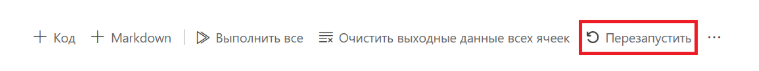

Другой вариант сбросить настройки logging — воспользоваться функцией reload() из вспомогательной системной библиотеки importlib:

In [36]:
from importlib import reload
import logging
reload(logging)

<module 'logging' from 'c:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\logging\\__init__.py'>

Далее, когда настройки логирования сброшены, нам необходимо перед выводом сообщений, сразу после импорта, изменить конфигурацию логгера.

In [37]:
logging.basicConfig(level=logging.DEBUG)

In [38]:
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

DEBUG:root:This is a debug message
INFO:root:This is an informational message
ERROR:root:This is an error message
CRITICAL:root:This is a critical message


Мы настроили уровень ведения журнала DEBUG. Это означает, что теперь будут отслеживаться только сообщения этого уровня (DEBUG) и выше. В результате выполнения кода логирования мы должны получить следующие сообщения:

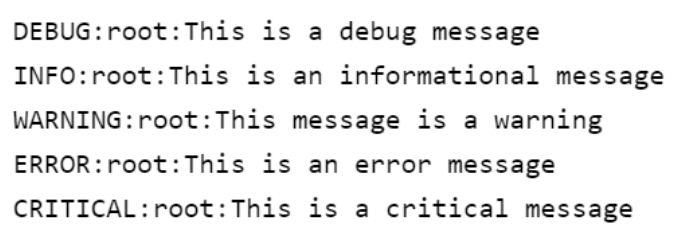

Как видно из результата выполнения кода, теперь в консоль выводятся лог-сообщения всех уровней.

Однако, как вы понимаете, логирование в консоль ничем не лучше простого вывода сообщений с помощью функции print(). Обычно логирование производится в специальные лог-файлы, для этого используются **обработчики (хендлеры) логов.** Давайте рассмотрим пример логирования в файл.

## Установка обработчика логирования

Функция **обработчиков ведения журналов** состоит в том, чтобы отображать записи/сообщения журнала на любом выходе, который вы выберете. То есть вы можете выбрать, отображать ли ваш лог в виде файла, HTTP-страницы или даже отправить лог на электронную почту через SMTP.

Более того, у созданного вами logger может быть несколько обработчиков, а это значит, что вы можете настроить его на сохранение в файл журнала, а также на отправку по email одновременно. Подробнее ознакомиться с видами хендлеров можно [здесь.](https://digitology.tech/docs/python_3/library/logging.handlers.html)

Обработчики являются классами модуля logging. Нам понадобится обработчик FileHandler, который возьмёт запись/сообщение журнала и добавит его в файл журнала log_file.log:

In [39]:
logging.FileHandler('data/log_file.log')

<FileHandler d:\IDE\Skillfactory\Project_homework\30. EDA-5. Проектирование экспериментов\data\log_file.log (NOTSET)>

## Установка формата логирования

Как мы уже сказали, типичный формат лога выглядит так: уровень: имя: сообщение. Однако его можно изменить.

Существуют различные способы форматирования записи журнала. Вы можете включить дату, время и уровень ведения журнала в свой формат, чтобы знать, когда журнал был отправлен и на каком уровне. В приведённом ниже примере показано, как можно настроить формат записей журнала. Так как мы вновь переопределяем настройки библиотеки logging, то не забудем сбросить конфигурацию.

In [40]:
from importlib import reload
import logging
reload(logging)
 
logging.basicConfig(
    format="%(levelname)s: %(asctime)s: %(message)s",
    level=logging.DEBUG
)
logging.info('Check')

INFO: 2025-01-16 20:02:47,179: Check


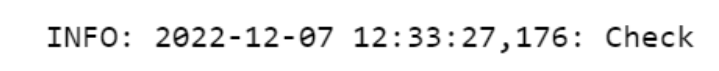

Здесь формат записей журнала включает дату, время, уровень ведения журнала и само сообщение.

Таким образом, вы можете изменять как формат лога, так и формат вывода. Добавление времени сообщения существенно облегчает работу — становится легко отследить, когда было получено сообщение.

Теперь, когда вы понимаете основы модуля logging в Python, посмотрим, как можно его использовать при проведении экспериментов по машинному обучению. Давайте залогируем информацию о нашем датасете [Medical Appointment No Shows. ](https://www.kaggle.com/datasets/joniarroba/noshowappointments)

Создадим новый ipynb файл, в котором будем выполнять логирование. Скачать оригинальный ноутбук вы можете по [ссылке.](https://lms-cdn.skillfactory.ru/assets/courseware/v1/772d6b261cf40414d610f393cb2adda5/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/noshowappointments_logging.ipynb)

Создадим функцию get_logger() для генерации лог-файла и записи в него информации.



In [41]:
import os.path

# Функция для создания лог-файла и записи в него информации
def get_logger(path, file):
  """[Создает лог-файл для логирования в него]
  Аргументы:
      path {string} -- путь к директории
      file {string} -- имя файла
   Возвращает:
      [obj] -- [логер]
  """
  # проверяем, существует ли файл
  log_file = os.path.join(path, file)
 
  #если  файла нет, создаем его
  if not os.path.isfile(log_file):
      open(log_file, "w+").close()
  
  # поменяем формат логирования
  file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"
  
  # конфигурируем лог-файл
  logging.basicConfig(level=logging.INFO, 
  format = file_logging_format)
  logger = logging.getLogger()
  
  # создадим хэнлдер для записи лога в файл
  handler = logging.FileHandler(log_file)
  
  # установим уровень логирования
  handler.setLevel(logging.INFO)
  
  # создадим формат логирования, используя file_logging_format
  formatter = logging.Formatter(file_logging_format)
  handler.setFormatter(formatter)
  
  # добавим хэндлер лог-файлу
  logger.addHandler(handler)
  return logger

Итак, get_logger принимает на вход папку, в которой вы хотите хранить файл лога и имя файла. Функция нацелена на создание информационных сообщений и записи их в лог-файл. Для того, чтобы освежить в памяти знания по работе с файлами, вы можете вернуться к Блоку 2 нашего курса («Подгрузка данных»).  

Для удобства лог-файлы хранят в отдельной директории. Новую папку можно создать с помощью команды mkdir:



Создадим лог-файл и запишем туда информацию о датасете.

In [43]:
!mkdir logs

In [47]:
df = pd.read_csv('data/KaggleV2-May-2016.csv')
display(df)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [54]:
# создаем лог-файл
logger = get_logger(path="logs/", file="data.logs")

logger.info("Data")

logger.info("Data shape {}".format(df.shape))

logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))

logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))

INFO: 2025-01-16 20:10:56,010: Data
INFO: 2025-01-16 20:10:56,010: Data shape (110527, 14)
C:\Users\User\AppData\Local\Temp\ipykernel_14660\2576330178.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))
INFO: 2025-01-16 20:10:56,018: Percentage of women: 0.653882342398853
C:\Users\User\AppData\Local\Temp\ipykernel_14660\2576330178.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))
INFO: 2025-01-16 20:10:56,027: P

В директории logs появится файл data.logs, который будет выглядеть следующим образом:

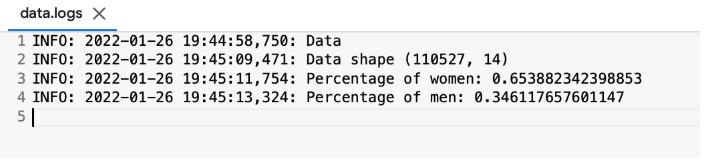

⭐️ Отлично! Мы зафиксировали информацию о датасете в лог-файл. Такой файл отражает сведения о том, что всё работает в штатном режиме (то есть просто ежедневный мониторинг программы) или что произошла какая-то ошибка, на которую нужно максимально срочно отреагировать и устранить. Например, мы можем проверять форму данных, и, если форма не соответствует необходимой, логировать ошибку:

In [56]:
if df.shape != (110526,14):
 logger.error('Data shape is incorrect!')

ERROR: 2025-01-16 20:11:15,136: Data shape is incorrect!


Посмотрим на обновленный файл data.logs:

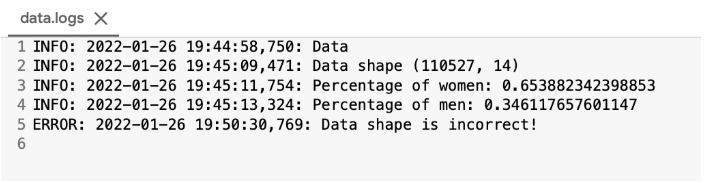

### Задание 3.1

Как называется модуль, который определяет функции и классы, реализующие гибкую систему регистрации событий для приложений и библиотек?

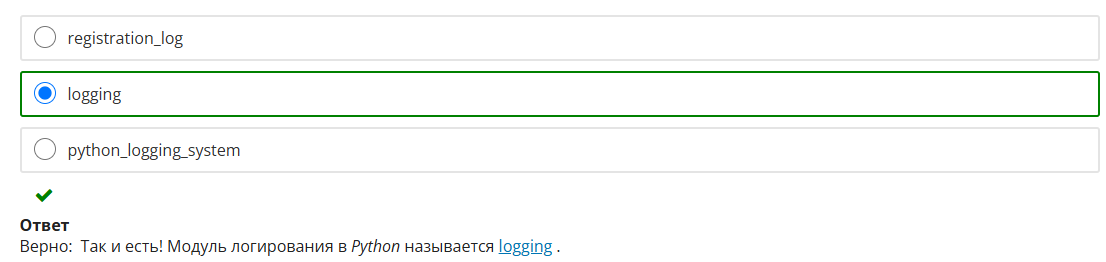

### Задание 3.2

Соотнесите классы обработчиков ведения журналов (хендлеры [StreamHandler](https://docs.python.org/3/library/logging.handlers.html#logging.StreamHandler), [FileHandler](https://docs.python.org/3/library/logging.handlers.html#logging.FileHandler), [HTTPHandler](https://docs.python.org/3/library/logging.handlers.html#logging.handlers.HTTPHandler)) с форматом выхода логирования.

отправка сообщений журнала на веб-сервер

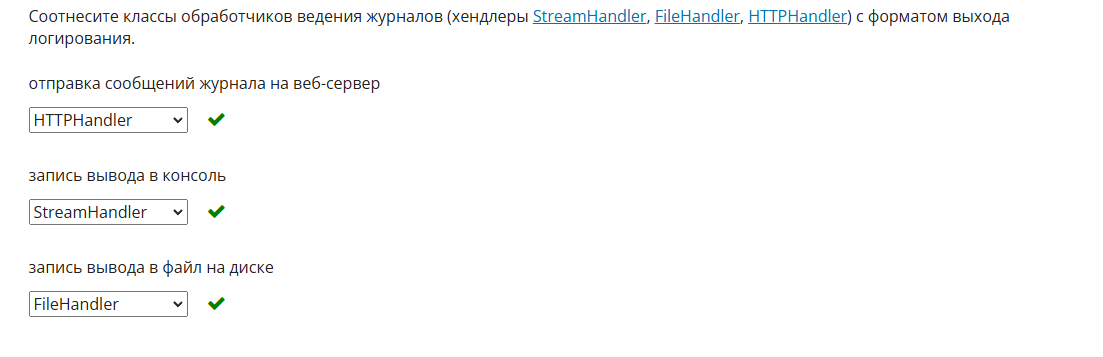

### Задание 3.3

Какой метод используется для записи информационного сообщения в лог-файл?

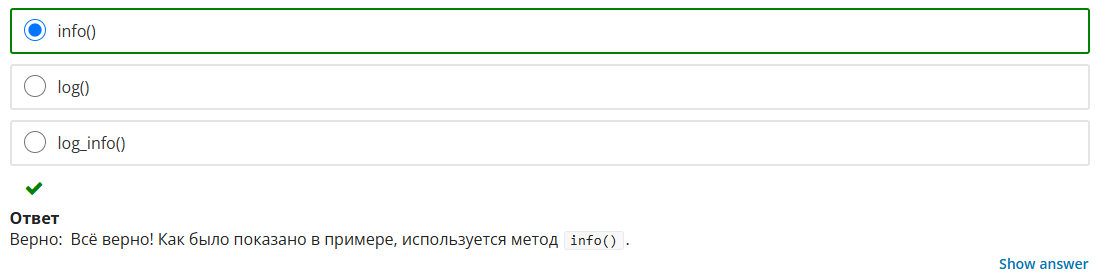